# Calculating Betas Using Pandas DataFrames

## 1. Import Libraries and Dependencies

In [1]:
# Import necessary libraries and dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline



## 2. Create a Path to the File Using Pathlib.

In [3]:
# Set the file paths for the CSVs using the Path class from the pathlib library
mipath=Path("../Resources/MSFT.csv")
spath=Path("../Resources/SP500.csv")

## 3. Read the CSV into a Pandas DataFrame.

In [7]:
# Read the daily closing prices of MSFT, set the `date` as a datetime index
ms_data=pd.read_csv(mipath, index_col="date", infer_datetime_format=True, parse_dates=True)
spy_data=pd.read_csv(spath, index_col="date", infer_datetime_format=True, parse_dates=True)


## 4. Combine DataFrames and Sort the Index

In [9]:
# Use the concat function to combine the DataFrames by column and perform an inner join. 
mspy_conc_df = pd.concat([ms_data, spy_data], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
mspy_conc_df.sort_index(inplace=True)

# Display a few rows
mspy_conc_df.head()

,close,volume,open,high,low,close
date,,,,,,
2014-05-20,39.68,21318920,39.68,39.94,39.4600,1872.829956
2014-05-21,40.35,22377460,39.80,40.35,39.7399,1888.030029
2014-05-22,40.10,20201010,40.29,40.35,39.8500,1892.489990
2014-05-23,40.12,18013300,40.37,40.37,40.0000,1900.530029
2014-05-27,40.19,26160450,40.26,40.26,39.8100,1911.910034


## 5. Drop Extraneous Columns

In [12]:
# Drop extra columns and only leave the close columns and associated values
mspy_conc_df.drop(columns=["volume", "open", "high", "low"], inplace=True)
mspy_conc_df.head()

,close,close
date,,
2014-05-20,39.68,1872.829956
2014-05-21,40.35,1888.030029
2014-05-22,40.10,1892.489990
2014-05-23,40.12,1900.530029
2014-05-27,40.19,1911.910034


## 6. Rename Columns

In [14]:
# Rename the columns to match the corresponding stock
mspy_conc_df.columns=["MSFT", "SP500"]
mspy_conc_df.head()

,MSFT,SP500
date,,
2014-05-20,39.68,1872.829956
2014-05-21,40.35,1888.030029
2014-05-22,40.10,1892.489990
2014-05-23,40.12,1900.530029
2014-05-27,40.19,1911.910034


## 7. Calculate Daily Returns

In [16]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
dr = mspy_conc_df.pct_change()
dr.head()

,MSFT,SP500
date,,
2014-05-20,NaN,NaN
2014-05-21,0.016885,0.008116
2014-05-22,-0.006196,0.002362
2014-05-23,0.000499,0.004248
2014-05-27,0.001745,0.005988


## 8. Calculate Covariance of MSFT returns vs. S&P 500 returns

In [21]:
# Calculate covariance of all daily returns of MSFT vs. S&P 500
covariance = dr["MSFT"].cov(dr["SP500"])
covariance

9.084836971066263e-05

## 9. Calculate Variance of SP500 Returns

In [24]:
# Calculate variance of the S&P 500
sp_variance = dr["SP500"].var()
sp_variance

7.030950113534627e-05

## 10. Calculate Beta of MSFT

In [25]:
# Calculate beta of all daily returns of MSFT
ms_beta = covariance/sp_variance
ms_beta

1.2921208121755678

## 11. Calculate 30-Day Rolling Covariance of MSFT Returns vs. S&P 500 Returns

<AxesSubplot:title={'center':'Rolling 30-Days covariance of Microsoft vs SP500 Returns'}, xlabel='date'>

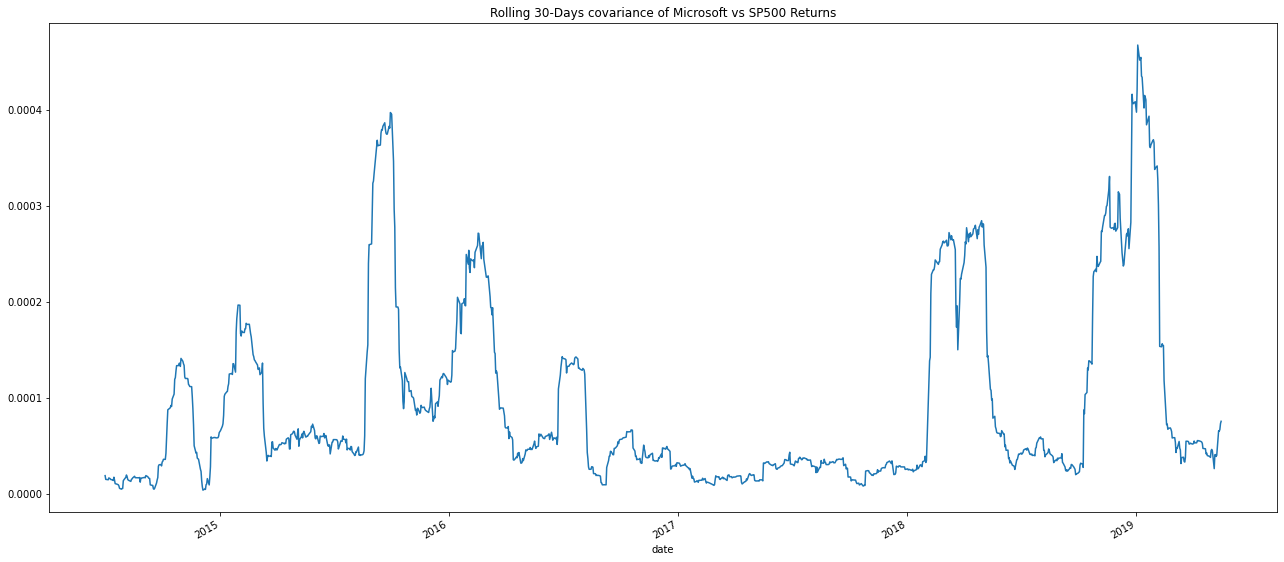

In [34]:
# Calculate 30-day rolling covariance of MSFT vs. S&P 500 and plot the data
ro_cov_ms = dr["MSFT"].rolling(window=30).cov(dr["SP500"])
ro_cov_ms.plot(figsize=(22,10), title="Rolling 30-Days covariance of Microsoft vs SP500 Returns")

## 12. Calculate 30-Day Rolling Variance of S&P 500 Returns

<AxesSubplot:title={'center':'Rolling 30 Day Variance of SP500 Returns'}, xlabel='date'>

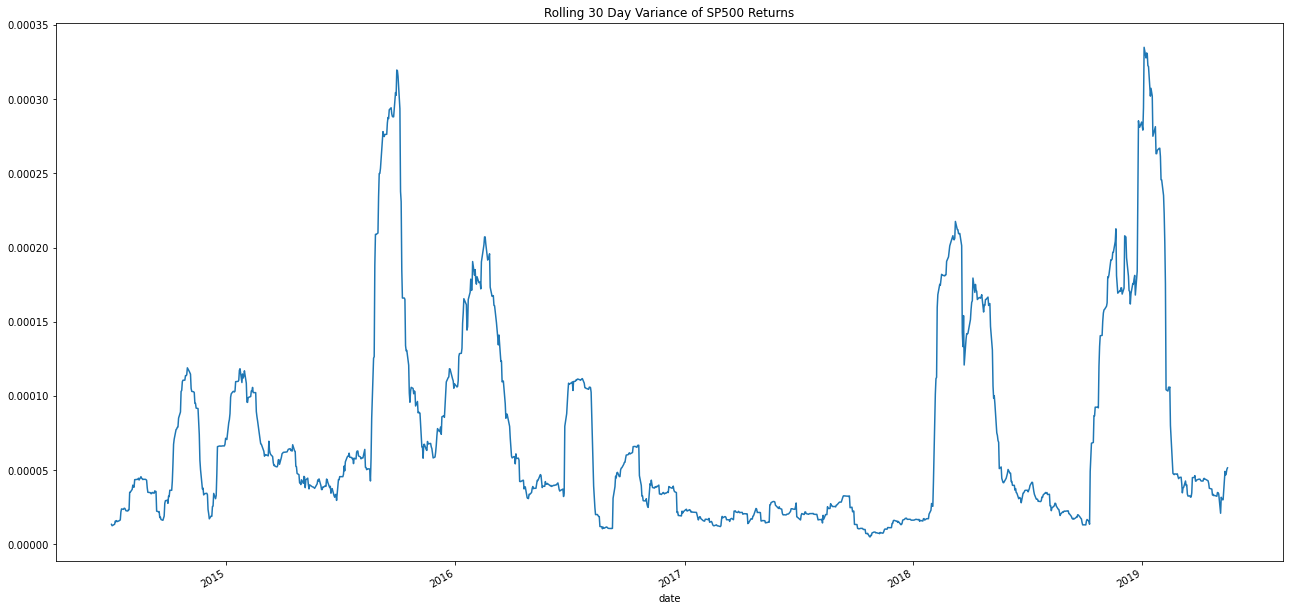

In [33]:
# Calculate 30-day rolling variance of MSFT vs. S&P 500 and plot the data
ro_var_sp = dr["SP500"].rolling(window=30).var()
ro_var_sp.plot(figsize=(22,11), title="Rolling 30 Day Variance of SP500 Returns")


## 13. Calculate 30-Day Rolling Beta of MSFT

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Microsoft'}, xlabel='date'>

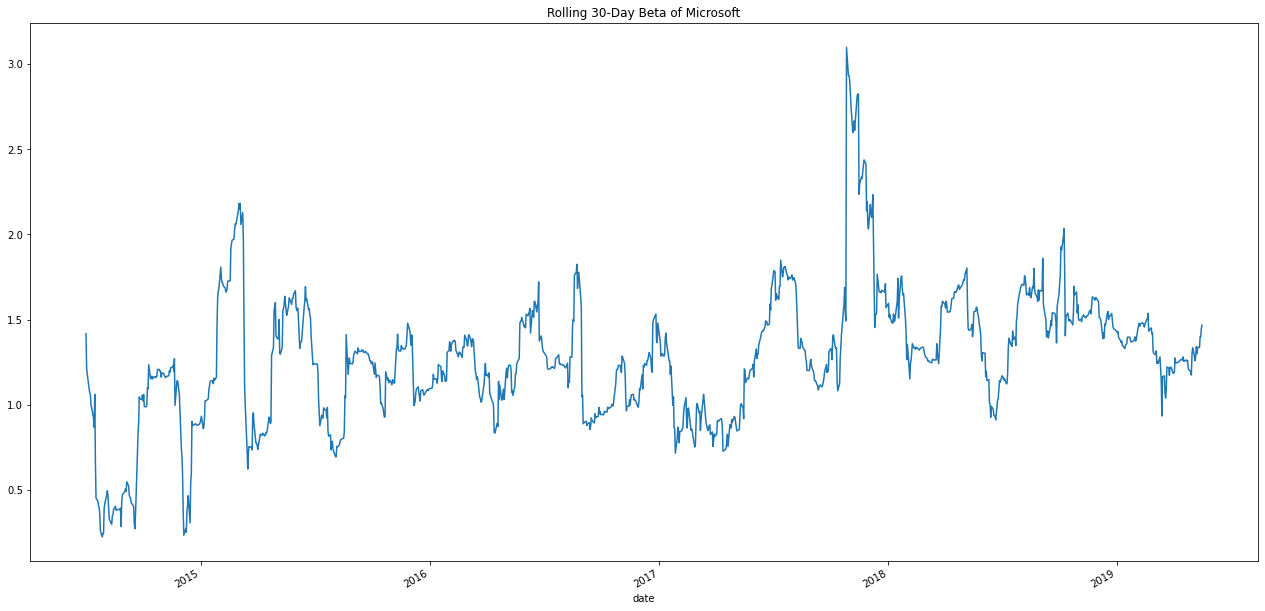

In [30]:
# Calculate 30-day rolling beta of MSFT and plot the data
ro_be_ms = ro_cov_ms/ro_var_sp
ro_be_ms.plot(figsize=(22,11), title= "Rolling 30-Day Beta of Microsoft")

## 14. Beta vs. Correlation

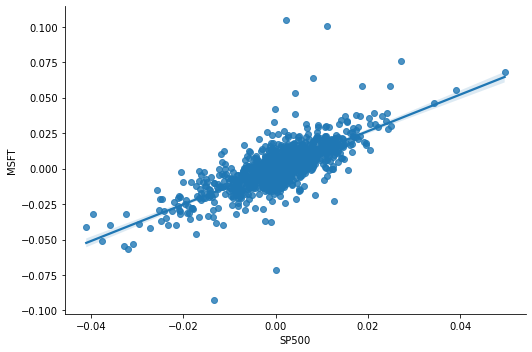

In [32]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
sns.lmplot(x="SP500", y="MSFT", data=dr, aspect=1.5, fit_reg=True)

